In [22]:
!python --version

Python 3.7.12


In [23]:
!pip uninstall keras-nightly
!pip install h5py==2.10.0
!pip install keras==2.2.4
!pip3 install tensorflow==1.15.3
%tensorflow_version 1.x

  Using cached Keras-2.2.4-py2.py3-none-any.whl (312 kB)
  Attempting uninstall: keras
    Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1


  Using cached tensorflow-1.15.3-cp37-cp37m-manylinux2010_x86_64.whl (110.5 MB)
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 1.15.2
    Uninstalling tensorflow-1.15.2:
      Successfully uninstalled tensorflow-1.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.6 requires tensorflow>=2.0.0, but you have tensorflow 1.15.3 which is incompatible.


In [24]:
!pip install mrcnn

In [25]:
import glob
from pathlib import Path
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
%tensorflow_version 1.x
tf.disable_v2_behavior()
from tensorflow import keras 
import cv2
import xml.etree.ElementTree as ET
from mrcnn.utils import Dataset, compute_ap
from mrcnn.config import Config
from mrcnn.model import MaskRCNN, load_image_gt, mold_image

#Ignore warning
import warnings
warnings.filterwarnings('ignore')

In [26]:
def paths(path, allowed_extension, name):
    global Path
    images_dir = Path(path)
    filepaths = pd.Series((images_dir.glob(f'**/*.{allowed_extension}'))).astype(str)
    filepaths.name = name
    return filepaths

In [27]:
img_path = '/content/drive/MyDrive/connector-data-drive/imgs'
imgPath = paths(img_path, 'jpg', 'ImagePath')
imgPath

0     /content/drive/MyDrive/connector-data-drive/im...
1     /content/drive/MyDrive/connector-data-drive/im...
2     /content/drive/MyDrive/connector-data-drive/im...
3     /content/drive/MyDrive/connector-data-drive/im...
4     /content/drive/MyDrive/connector-data-drive/im...
5     /content/drive/MyDrive/connector-data-drive/im...
6     /content/drive/MyDrive/connector-data-drive/im...
7     /content/drive/MyDrive/connector-data-drive/im...
8     /content/drive/MyDrive/connector-data-drive/im...
9     /content/drive/MyDrive/connector-data-drive/im...
10    /content/drive/MyDrive/connector-data-drive/im...
11    /content/drive/MyDrive/connector-data-drive/im...
12    /content/drive/MyDrive/connector-data-drive/im...
13    /content/drive/MyDrive/connector-data-drive/im...
14    /content/drive/MyDrive/connector-data-drive/im...
15    /content/drive/MyDrive/connector-data-drive/im...
16    /content/drive/MyDrive/connector-data-drive/im...
17    /content/drive/MyDrive/connector-data-driv

In [28]:
annot_path = '/content/drive/MyDrive/connector-data-drive/annotated'
annotPath = paths(annot_path, 'xml', 'AnnotatedImg')
annotPath

0     /content/drive/MyDrive/connector-data-drive/an...
1     /content/drive/MyDrive/connector-data-drive/an...
2     /content/drive/MyDrive/connector-data-drive/an...
3     /content/drive/MyDrive/connector-data-drive/an...
4     /content/drive/MyDrive/connector-data-drive/an...
5     /content/drive/MyDrive/connector-data-drive/an...
6     /content/drive/MyDrive/connector-data-drive/an...
7     /content/drive/MyDrive/connector-data-drive/an...
8     /content/drive/MyDrive/connector-data-drive/an...
9     /content/drive/MyDrive/connector-data-drive/an...
10    /content/drive/MyDrive/connector-data-drive/an...
11    /content/drive/MyDrive/connector-data-drive/an...
12    /content/drive/MyDrive/connector-data-drive/an...
13    /content/drive/MyDrive/connector-data-drive/an...
14    /content/drive/MyDrive/connector-data-drive/an...
15    /content/drive/MyDrive/connector-data-drive/an...
16    /content/drive/MyDrive/connector-data-drive/an...
17    /content/drive/MyDrive/connector-data-driv

In [29]:
df = pd.concat([imgPath, annotPath], axis=1)
df

,ImagePath,AnnotatedImg
0,/content/drive/MyDrive/connector-data-drive/im...,/content/drive/MyDrive/connector-data-drive/an...
1,/content/drive/MyDrive/connector-data-drive/im...,/content/drive/MyDrive/connector-data-drive/an...
2,/content/drive/MyDrive/connector-data-drive/im...,/content/drive/MyDrive/connector-data-drive/an...
3,/content/drive/MyDrive/connector-data-drive/im...,/content/drive/MyDrive/connector-data-drive/an...
4,/content/drive/MyDrive/connector-data-drive/im...,/content/drive/MyDrive/connector-data-drive/an...
5,/content/drive/MyDrive/connector-data-drive/im...,/content/drive/MyDrive/connector-data-drive/an...
6,/content/drive/MyDrive/connector-data-drive/im...,/content/drive/MyDrive/connector-data-drive/an...
7,/content/drive/MyDrive/connector-data-drive/im...,/content/drive/MyDrive/connector-data-drive/an...
8,/content/drive/MyDrive/connector-data-drive/im...,/content/drive/MyDrive/connector-data-drive/an...
9,/content/drive/MyDrive/connector-data-drive/im...,/content/drive/MyDrive/connector-data-drive/an...


In [30]:
#Loading and parsing the file
tree = ET.parse(df['AnnotatedImg'][0])
tree

In [31]:
root = tree.getroot()
root

<Element 'annotation' at 0x7f1d15f56a70>

In [32]:
for box in root.findall('.//bndbox'):
    xmin = int(box.find('xmin').text)
    ymin = int(box.find('ymin').text)
    xmax = int(box.find('xmax').text)
    ymax = int(box.find('ymax').text)
    coors = [xmin, ymin, xmax, ymax]

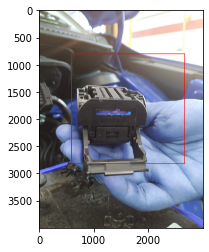

In [33]:
img = cv2.imread(df['ImagePath'][0])
img = cv2.rectangle(img, (coors[0], coors[1]), (coors[2], coors[3]), color=(255,0,0), thickness=10)
plt.imshow(img)

In [34]:
def extract_boxes(filename):
    #Loading and parsing the file
    tree = ET.parse(filename)
    #Getting the root of the document
    root = tree.getroot()
    #Extracting each box
    boxes = []
    for box in root.findall('.//bndbox'):
        xmin = int(box.find('xmin').text)
        ymin = int(box.find('ymin').text)
        xmax = int(box.find('xmax').text)
        ymax = int(box.find('ymax').text)       
        coors = [xmin, ymin, xmax, ymax]
        boxes.append(coors)
    #Extracting image dimesnions
    width = int(root.find('.//size/width').text)
    height = int(root.find('.//size/height').text)    
    return boxes, width, height

In [35]:
boxes, w, h = extract_boxes(df['AnnotatedImg'][1])
print(boxes, w, h)

[[582, 803, 2653, 2803]] 4000 3000


In [36]:
class ConnectorDataset(Dataset):
    #Loading the data
    def load_data(self, dataset_dir, is_train=True):
        #defining one class
        self.add_class("dataset", 1, "connector")
        #define data location
        img_dir = dataset_dir + '/imgs/'
        annotate_dir = dataset_dir + '/annotated/'
        #finding all images
        for filename in os.listdir(img_dir):
            #extract image_id
            image_id = filename[:-4]
            img_path = img_dir + filename
            ann_path = annotate_dir + image_id + '.xml'
            self.add_image('dataset', image_id = image_id, path = img_path, annotation = ann_path)
    #Loading the masks
    def load_mask(self, image_id):
        #get details of an image
        info = self.image_info[image_id]
        #define box file location
        path = info['annotation']
        #parsing xml file
        boxes, w, h = extract_boxes(path)
        #create one array for all masks
        masks = np.zeros([h, w, len(boxes)], dtype = 'uint8')
        #create masks
        class_ids = []
        for i in range(len(boxes)):
            box = boxes[i]
            row_s, row_e = box[1], box[3]
            col_s, col_e = box[0], box[2]
            masks[row_s:row_e, col_s:col_e, i] = 1
            class_ids.append(self.class_names.index('connector'))
        return masks, np.asarray(class_ids, dtype='int32')
    #Loading image for reference
    def image_reference(self, image_id):
        info = self.image_info[image_id]
        return info['path']

In [37]:
train_set = ConnectorDataset()
train_set.load_data('/content/drive/MyDrive/connector-data-drive')
train_set.prepare()
print('Train set:', len(train_set.image_ids))

test_set = ConnectorDataset()
test_set.load_data('/content/drive/MyDrive/connector-data-drive/test')
test_set.prepare()
print('Test set: ', len(test_set.image_ids))

Train set: 23
Test set:  7


In [38]:
#Testing the class
image_id = 0
#load img
img = train_set.load_image(image_id)
#load respective mask
mask, class_id = train_set.load_mask(image_id)
print(mask.shape)

(4000, 3000, 1)


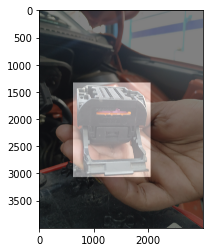

In [39]:
#plot the image
plt.imshow(img)
plt.imshow(mask[:,:,0],cmap = 'gray', alpha = 0.5)

In [40]:
class ConnectorConfig(Config):
    NAME = 'connector_cfg'
    NUM_CLASSES = 1+1
    STEPS_PER_EPOCH = 100
    
config = ConnectorConfig()

In [41]:
model = MaskRCNN(mode='training', model_dir = '/content/', config=config)

In [43]:
# model.load_weights('/content/drive/MyDrive/connector-data-drive/mask_rcnn_coco.h5',
#                    by_name = True,
#                    exclude=["mrcnn_class_logits", "mrcnn_bbox_fc",  "mrcnn_bbox", "mrcnn_mask"])

In [44]:
# model.keras_model.metrics_tensors = []
# model.train(train_set, test_set,
#             learning_rate = config.LEARNING_RATE,
#             epochs = 5,
#             layers='heads')

In [45]:
class PredictionConfig(Config):
	# define the name of the configuration
	NAME = "kangaroo_cfg"
	# number of classes (background + kangaroo)
	NUM_CLASSES = 1 + 1
	# simplify GPU config
	GPU_COUNT = 1
	IMAGES_PER_GPU = 1
	BATCH_SIZE = 1

In [46]:
cfg = PredictionConfig()
model = MaskRCNN(mode='inference', 
                 model_dir='/content/', 
								 config = cfg)



Instructions for updating:
Use `tf.cast` instead.


In [47]:
model.load_weights('/content/drive/MyDrive/connector-data-drive/connector_model1.h5',
                   by_name = True)

In [48]:
def evaluate_model(dataset, model, cfg):
  aps = []
  for image_id in dataset.image_ids:
    #Loading image, bbox and masks for image id
    image, _, gt_class_id, gt_bbox, gt_mask = load_image_gt(dataset, cfg, image_id, use_mini_mask=False)
    #Converting pixel values
    scaled_image = mold_image(image, cfg)
    #Converting image into sample
    sample = np.expand_dims(scaled_image, 0)
    #Detecting connectors
    y_pred = model.detect(sample)
    #Extract results for first sample
    r = y_pred[0]
    #Calculate statistics including AP
    AP, _, _, _ = compute_ap(gt_bbox, gt_class_id, gt_mask, r["rois"], r["class_ids"], r["scores"], r["masks"])
    #store the value
    aps.append(AP)
  #Calculating mean AP
  mAP = np.mean(aps)
  return mAP

In [49]:
train_mAP = evaluate_model(train_set, model, cfg)

In [50]:
train_mAP

0.9565217391304348